# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID' )

# Display the data table for preview
merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice.
mice = mouse_study_df["Mouse ID"].value_counts()
micenumber = len(mice)
micenumber

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate = merge.loc[merge.duplicated(subset=["Mouse ID", 'Timepoint']), 'Mouse ID'].unique()
print(f'Duplicate ID: {Duplicate}')

Duplicate ID: ['g989']


In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
totaldupdata = merge[merge.duplicated(["Mouse ID", "Timepoint",])]
totaldupdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmerge = merge.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleanmerge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice in the clean DataFrame.
final_mice = len(merge["Mouse ID"].unique())
final_mice

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regmean = cleanmerge.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

regmedian = cleanmerge.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

regvar = cleanmerge.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

regstdv = cleanmerge.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

regsem = cleanmerge.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
summarydf1 = pd.DataFrame({"Mean": regmean, "Median":regmedian, "Variance":regvar, 
                               "Standard Deviation": regstdv, "SEM": regsem})
summarydf1

C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_20732\3361290015.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regmean = cleanmerge.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_20732\3361290015.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regmedian = cleanmerge.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_20732\3361290015.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summarydf2 = cleanmerge.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
summarydf2 = summarydf2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})
summarydf2

C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_20732\784991313.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summarydf2 = cleanmerge.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

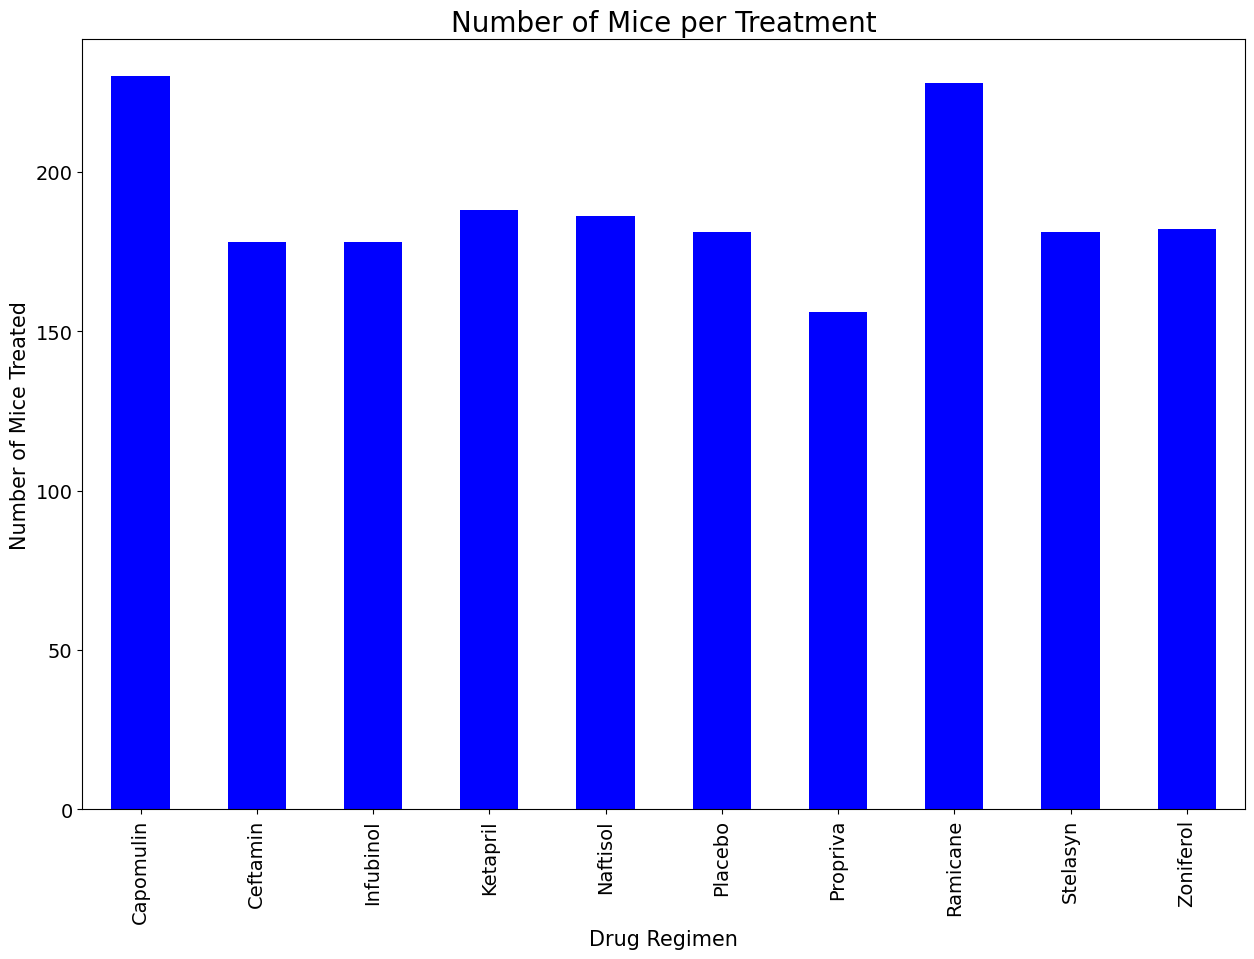

<Figure size 640x480 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugbar1 = cleanmerge.groupby(["Drug Regimen"]).count()["Mouse ID"]


#Formatting
pandaplot1 = drugbar.plot(kind="bar", color='b', figsize=(15,10), fontsize = 14)


plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

plt.show()
plt.tight_layout()

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

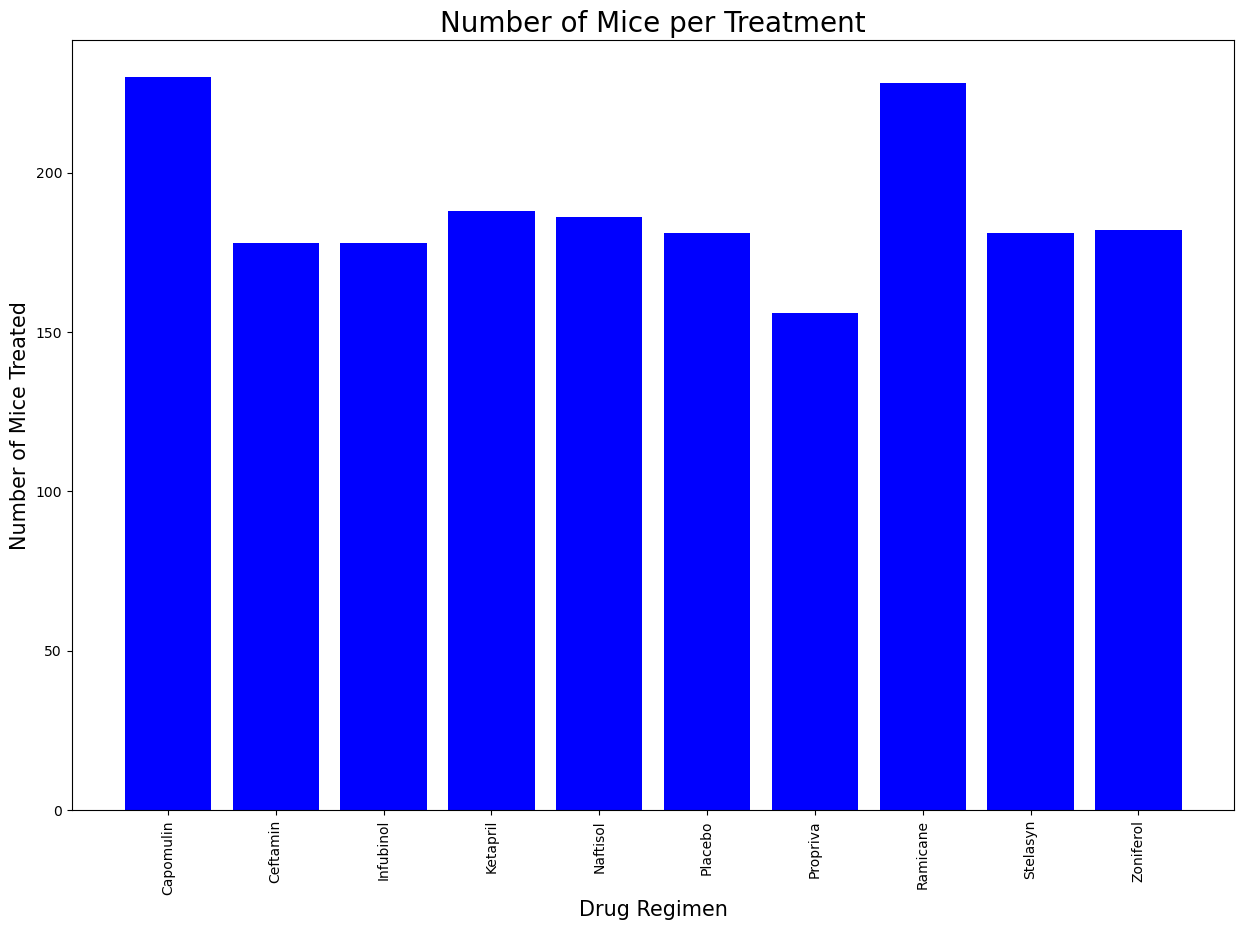

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugbar2 = (cleanmerge.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x = np.arange(len(drugbar1))
tick_locations = [value+0.4 for value in x]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, drugbar1.index.values, rotation="vertical")
plt.bar(x, drugbar2, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

drugbar2

<Axes: title={'center': 'M vs F Mice Populations'}, ylabel='Total Count'>

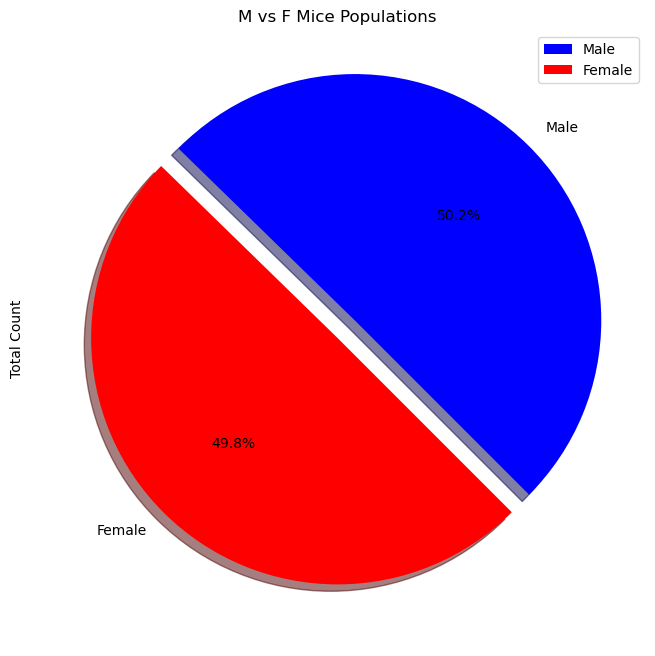

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Mice gender count
genrows = cleanmerge.loc[:, ["Sex", "Mouse ID"]]
genrows = genrows.drop_duplicates()
gencount = genrows["Sex"].value_counts()
#Gender DataFrame
gendata = pd.DataFrame({'Total Count': gencount})

colors = ["blue", "red"]
explode = (0.1, 0)
pandapie = gendata.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="M vs F Mice Populations",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
pandapie

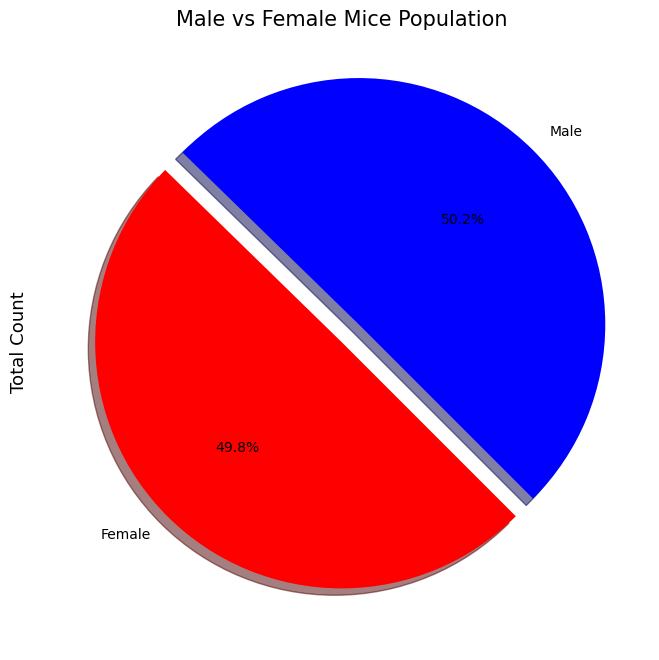

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue", "red"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Male vs Female Mice Population",fontsize = 15)
plt.ylabel("Total Count",fontsize = 13)
plt.pie(gencount, labels=labels, colors=colors, startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
bigtp = cleanmerge.groupby(["Mouse ID"])["Timepoint"].max()
bigtp = bigtp.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergeagain = bigtp.merge(cleanmerge, on=["Mouse ID", "Timepoint"], how="left")
mergeagain

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvollist = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatmentlist:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvol = mergeagain.loc[mergeagain["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorvollist.append(tumorvol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    outliers = tumorvol.loc[(tumorvol < lowerbound) | (tumorvol > upperbound)]
    print(f'For {drug}, the outliers are: {outliers}')

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x12d5af6c460>,
 'caps': [<matplotlib.lines.Line2D at 0x12d5af6c9a0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x12d5af6c0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x12d5af6cee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12d5af6d180>,
 'means': []}

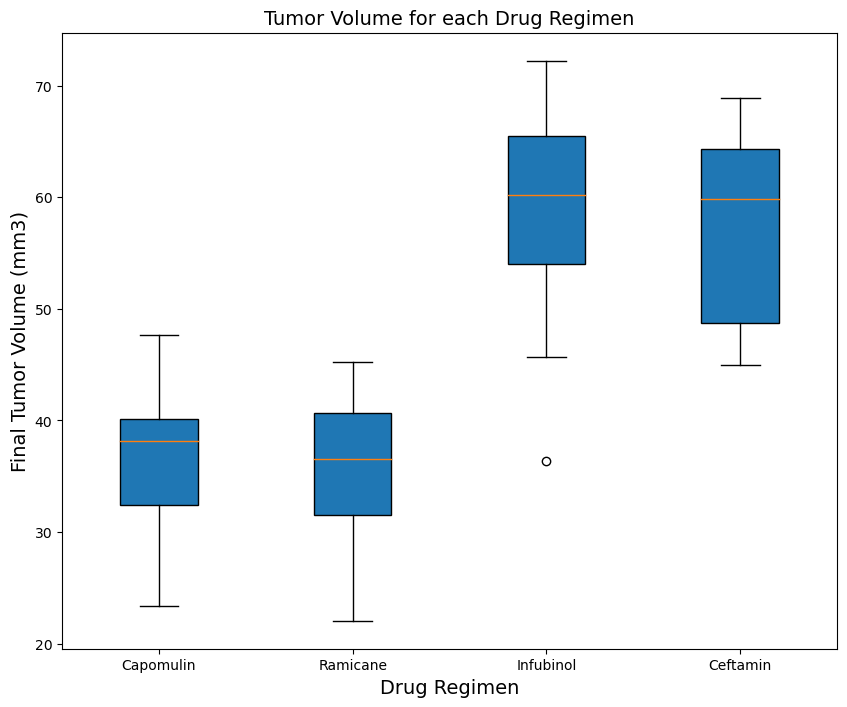

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =14)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumorvollist, labels=treatmentlist, widths = 0.4, patch_artist=True,vert=True)

## Line and Scatter Plots

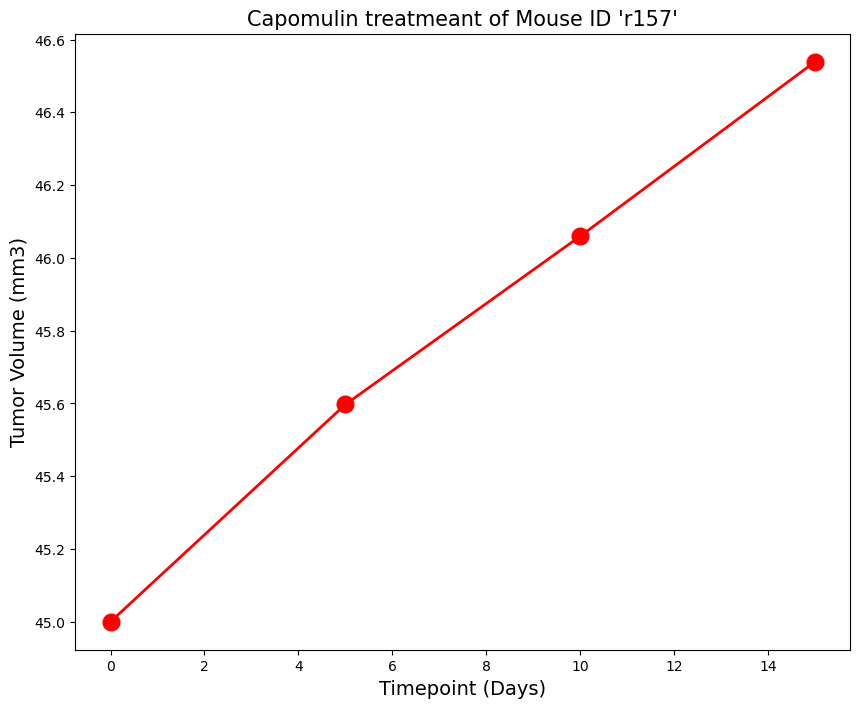

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#DataFrame
capomulindf = cleanmerge.loc[cleanmerge["Drug Regimen"] == "Capomulin",:]


#Mouser157 singled out
R157_Capo = capomulindf.loc[capomulindf["Mouse ID"] == 'r157']

#Plot Formatting using pyplot
x = R157_Capo['Timepoint']
y = R157_Capo['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.title("Capomulin treatmeant of Mouse ID 'r157'",fontsize =15)
plt.plot(x, y, linewidth=2, markersize=12, marker="o",color="red", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)

plt.show()

C:\Users\Thom's Laptop\AppData\Local\Temp\ipykernel_20732\2429230809.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_cap_vol = capomulindf.groupby(['Mouse ID']).mean()


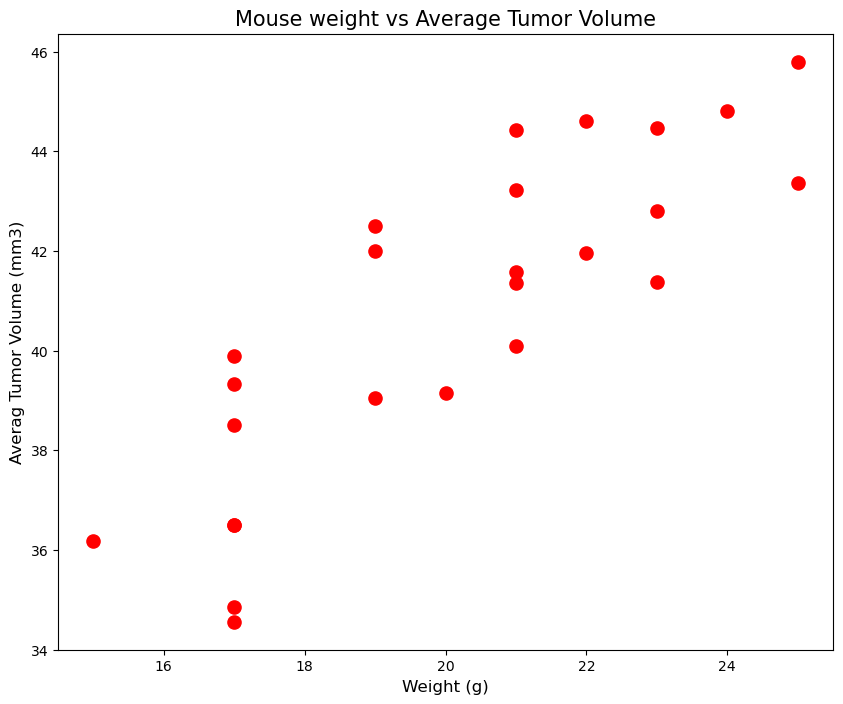

In [46]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_cap_vol = capomulindf.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(10, 8))
marker_size=12
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'],s=90, color="red")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =15)
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =12)

plt.show()

## Correlation and Regression

Correlation between weight(g) & tumor volume (mm3): 0.84
y = 0.95x + 21.55


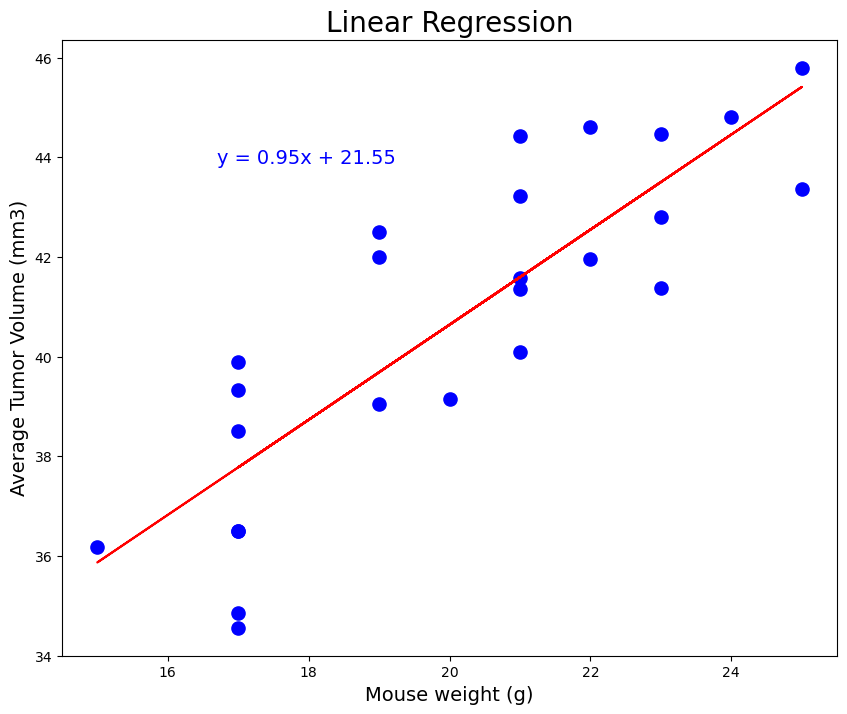

In [53]:
# Calculate the correlation coefficient 
correlation = round(st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])[0],2)
print(f'Correlation between weight(g) & tumor volume (mm3): {correlation}')
# and a linear regression model 
x_line = avg_cap_vol['Weight (g)']
y_line = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_line, y_line)
regress_values = x_line * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_line, y_line, s=90, color="blue")
plt.plot(x_line ,regress_values,"r-")
plt.title("Linear Regression", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=14,color="blue")

plt.show()


      
